In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math

# **1. Generisanje testnog signala**


Testni signal **y** je oblika **y(t)=m0 * sin(2 * pi * f0 * t)+ m1 * sin(2 * pi * f1 * t)** 

Mada moze biti bilo sta.



In [2]:
sampleFreq = 1000 # 1kHz
tlims=[0,1]   # u kom vremenskom intervalu se desavaju semplovi


signalFreq = [2,50] # f0, f1
signalMag = [1,0.2] # m0, m1

t=np.linspace(tlims[0], tlims[1], (tlims[1]-tlims[0])*sampleFreq)  #Vremenski interval linarizovano 


y = signalMag[0]*np.sin(2*math.pi*signalFreq[0]*t) + signalMag[1]*np.sin(2*math.pi*signalFreq[1]*t)
# y signal





 # **2.Fourier transform:**

In [3]:
y_to_plot=np.fft.fft(y)

f_cycle=np.fft.fftfreq(len(t),d=1.0/sampleFreq); #U ciklusima

# **3. Grafik signala:**

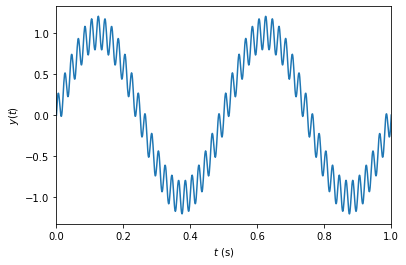

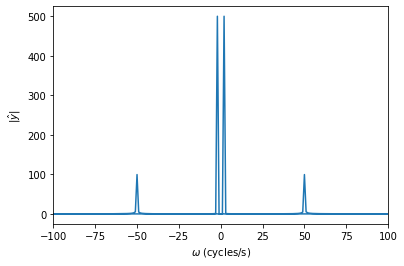

In [6]:
# Signal
plt.figure()
plt.plot(t,y);
plt.ylabel("$y(t)$");
plt.xlabel("$t$ (s)");
plt.xlim([min(t),max(t)]);

# Magnitude u odnosu na frekvenciju
plt.figure()
plt.plot(f_cycle,np.absolute(y_to_plot));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");


#**4. Funkcija prenosa niskopropusnog filtera**

Funkcija prenosa niskopropusnog filtera je:

# H(s)= ω0/(S + ω0)


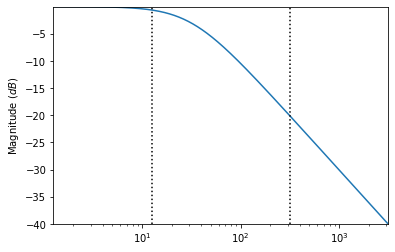

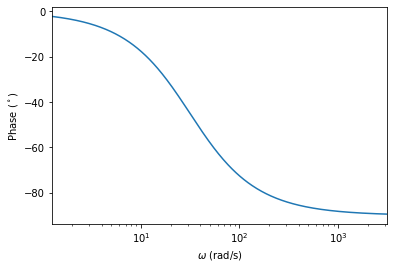

In [8]:
# Low-pass filter  cutof frekvencija 20 Hz
w0 = 2*np.pi*5; # pole frekvencija (rad/s)
num = w0        
den = [1,w0]    
lowPass = signal.TransferFunction(num,den) # Transfer funcija

# Bode plot
w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), np.log10(max(signalFreq)*2*np.pi*10), 500 )
w, mag, phase = signal.bode(lowPass,w)

# Magnitude grafik
plt.figure()
plt.semilogx(w, mag)
for sf in signalFreq:
    plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')
plt.ylabel("Magnitude ($dB$)")
plt.xlim([min(w),max(w)])
plt.ylim([min(mag),max(mag)])

# Faza
plt.figure()
plt.semilogx(w, phase)  
plt.ylabel("Phase ($^\circ$)")
plt.xlabel("$\omega$ (rad/s)")
plt.xlim([min(w),max(w)])
plt.show()

TransferFunctionDiscrete(
array([0.01546504, 0.01546504]),
array([ 1.        , -0.96906992]),
dt: 0.001
)
Filter coefficients b_i: [0.01546504 0.01546504]
Filter coefficients a_i: [0.96906992]


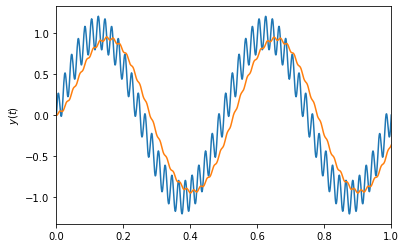

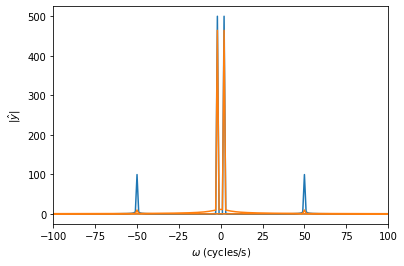

In [11]:
dt = 1.0/sampleFreq;
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)

 
 
 #Koificijenti diskretno 
b = discreteLowPass.num;
a = -discreteLowPass.den;
print("Filter coefficients b_i: " + str(b))
print("Filter coefficients a_i: " + str(a[1:]))

# Filtriranje
yfilt = np.zeros(len(y));
for i in range(3,len(y)):
    yfilt[i] = a[1]*yfilt[i-1] + b[0]*y[i] + b[1]*y[i-1];
    
# Signal
plt.figure()
plt.plot(t,y);
plt.plot(t,yfilt);
plt.ylabel("$y(t)$")
plt.xlim([min(t),max(t)]);

# FURIJEOVA
yfilt_to_plot = np.fft.fft(yfilt)
fcycles = np.fft.fftfreq(len(t),d=1.0/sampleFreq)

plt.figure()
plt.plot(fcycles,np.absolute(y_to_plot));
plt.plot(fcycles,np.absolute(yfilt_to_plot));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");